## Assignment 2: Data Modelling and Presentation
#### Name: Krishnakanth Srikanth
#### Student Number: s3959200
------------

### Project Goal

The main goal of this project is to design a classification model, that is able to **predict the intention of an online shopper (buy or no buy)**, based on the values of the given features.

Here, I will try two different classification algorithms (**KNN Classifier and Decision Tree Classifier**), and compare their performance, in order to pick the best one for this project.

### Task 1: Retrieving and Preparing the Data

###### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.utils import shuffle
from sklearn import tree

###### Importing the data set

In [2]:
orig_data = pd.read_csv('online_shoppers_intention.csv', error_bad_lines=False, header=0, skipinitialspace=True)
orig_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


###### Making a copy of original data set

In [3]:
data = orig_data.copy()

###### Checking the data types of the attributes

In [4]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

###### Checking the categorical values for any incorrect or duplicates

As per the documentation, there are 8 categorical variables. We proceed to check if there are any duplicates or incorrect values on those features below.

In [5]:
data['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [6]:
data['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [7]:
data['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [8]:
data['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [9]:
data['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

In [10]:
data['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

In [11]:
data['Region'].value_counts()

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

In [12]:
data['TrafficType'].value_counts()

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

Now that the categorical attributes have been checked for any duplicates or incorrect values, we proceed with checking the null/NA/missing values.

###### Check for null values

In [13]:
data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

We have **no NA or missing values** in this dataset.

###### Handling Outliers

Outliers can be handled by using the following formulas.
- IQR = Q3 – Q1
- Q3 = Third quartile (75%)
- Q1 = First quartile (25%)
- upperbound = Q3 + (1.5 * IQR)
- lowerbound = Q1 - (1.5 * IQR)

###### Checking for outliers in column ExitRates

In [14]:
data.shape

(12330, 18)

In [15]:
data['ExitRates'].describe()

count    12330.000000
mean         0.043073
std          0.048597
min          0.000000
25%          0.014286
50%          0.025156
75%          0.050000
max          0.200000
Name: ExitRates, dtype: float64

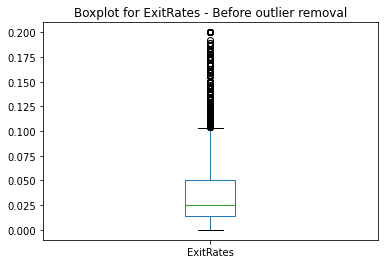

In [16]:
# Before handling outliers
data['ExitRates'].plot(kind='box')
plt.title("Boxplot for ExitRates - Before outlier removal")
plt.show()

From the above boxplot, we can clearly see the presence of outliers in the data for ExitRates. We need to remove them before we complete the pre-processing step.

In [17]:
# Handling and removing outliers
Q1=np.percentile(data['ExitRates'], 25, interpolation = 'midpoint')
Q3=np.percentile(data['ExitRates'], 75, interpolation = 'midpoint')

IQR=Q3-Q1

upperbound=Q3+(1.5*IQR)
lowerbound=Q1-(1.5*IQR)

data = data[((data["ExitRates"] < upperbound) & (data["ExitRates"] > lowerbound))]

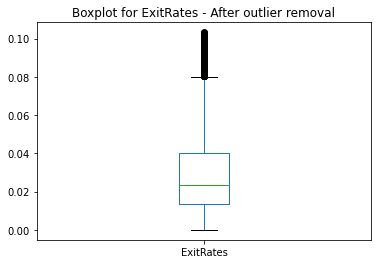

In [22]:
# After handling outliers
data['ExitRates'].plot(kind='box')
plt.title("Boxplot for ExitRates - After outlier removal")
plt.show()

###### Checking outliers for columns Administrative_Duration, Informational_Duration, ProductRelated_Duration

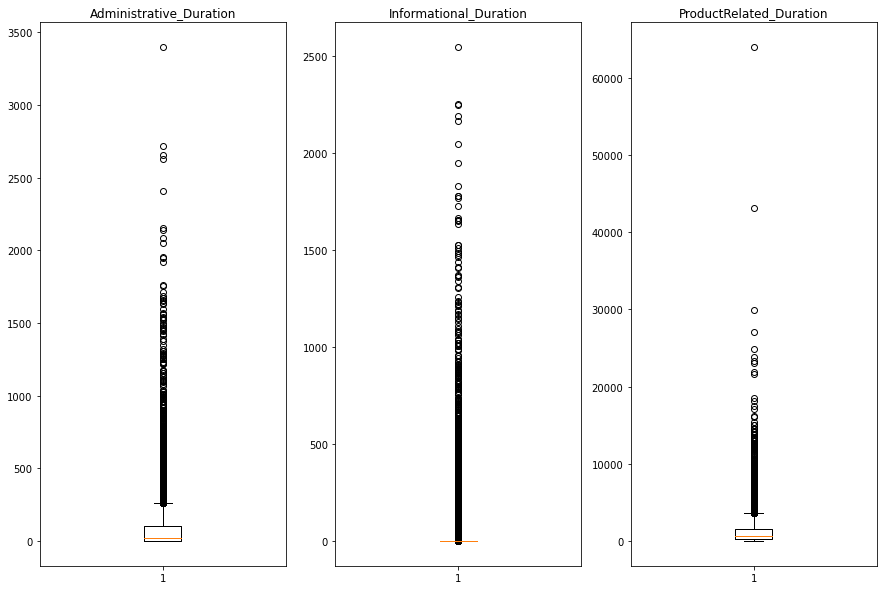

In [23]:
# Before handling outliers
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,10))

ax1.boxplot(data["Administrative_Duration"])
ax1.set_title("Administrative_Duration")

ax2.boxplot(data["Informational_Duration"])
ax2.set_title("Informational_Duration")

ax3.boxplot(data["ProductRelated_Duration"])
ax3.set_title("ProductRelated_Duration")

plt.show()

From the above boxplots, we can clearly see the presence of outliers in the data for all the columns. Hence, we proceed to remove them.

In [24]:
# Handling and removing outliers
srtAdminDur = np.sort(data['Administrative_Duration'])
Q1, Q3 = np.percentile(srtAdminDur, [25,75])
IQR = Q3 - Q1
upperAdminDur = Q3 + (1.5*IQR)
lowerAdminDur = Q1 - (1.5*IQR)

srtInfDur = np.sort(data['Informational_Duration'])
Q1, Q3 = np.percentile(srtInfDur, [25,75])
IQR = Q3 - Q1
upperInfoDur = Q3 + (1.5*IQR)
lowerInfoDur = Q1 - (1.5*IQR)

srtProdDur = np.sort(data['ProductRelated_Duration'])
Q1, Q3 = np.percentile(srtProdDur, [25,75])
IQR = Q3 - Q1
upperProdDur = Q3 + (1.5*IQR)
lowerProdDur = Q1 - (1.5*IQR)

data = data[((data["Administrative_Duration"] < upperAdminDur) & (data["Administrative_Duration"] > lowerAdminDur)) | 
            ((data["Informational_Duration"] < upperInfoDur) & (data["Informational_Duration"] > lowerInfoDur)) | 
            ((data["ProductRelated_Duration"] < upperProdDur) & (data["ProductRelated_Duration"] > lowerProdDur))]

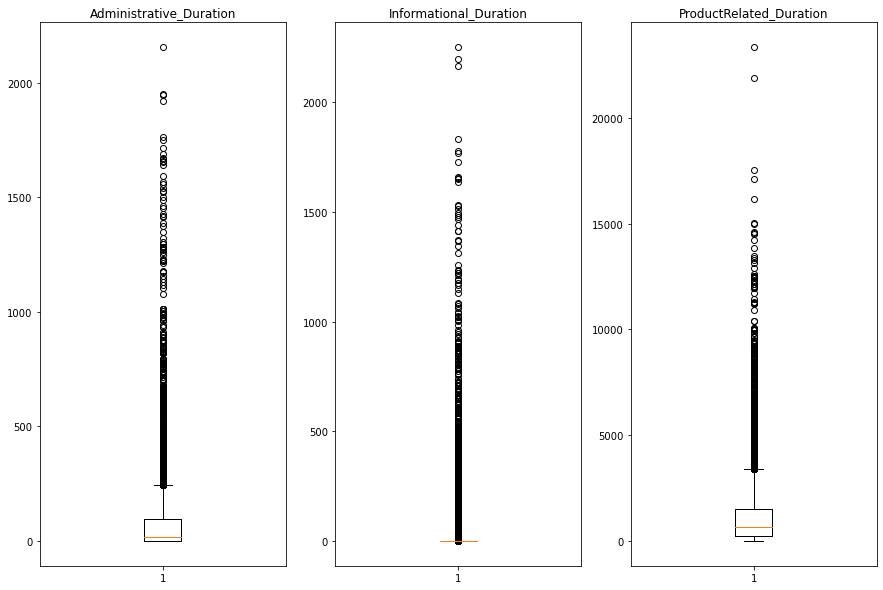

In [25]:
# After handling outliers
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,10))

ax1.boxplot(data["Administrative_Duration"])
ax1.set_title("Administrative_Duration")

ax2.boxplot(data["Informational_Duration"])
ax2.set_title("Informational_Duration")

ax3.boxplot(data["ProductRelated_Duration"])
ax3.set_title("ProductRelated_Duration")

plt.show()

###### Checking outliers for column BounceRates

In [27]:
data['BounceRates'].describe()

count    11013.000000
mean         0.008721
std          0.014595
min          0.000000
25%          0.000000
50%          0.000260
75%          0.012121
max          0.161905
Name: BounceRates, dtype: float64

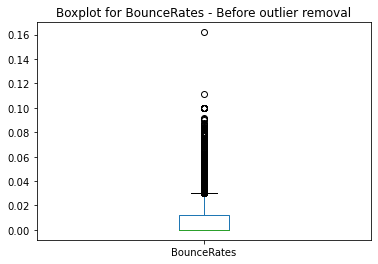

In [28]:
# Before handling outliers
data['BounceRates'].plot(kind='box')
plt.title("Boxplot for BounceRates - Before outlier removal")
plt.show()

From the above boxplot, we can clearly see the presence of outliers in the data for BounceRates. We need to remove them before we complete the pre-processing step.

In [29]:
# Handling and removing outliers
Q1=np.percentile(data['BounceRates'], 25, interpolation = 'midpoint')
Q3=np.percentile(data['BounceRates'], 75, interpolation = 'midpoint')

IQR=Q3-Q1

upperbound=Q3+(1.5*IQR)
lowerbound=Q1-(1.5*IQR)

data = data[((data["BounceRates"] < upperbound) & (data["BounceRates"] > lowerbound))]

In [30]:
data.shape

(10087, 18)

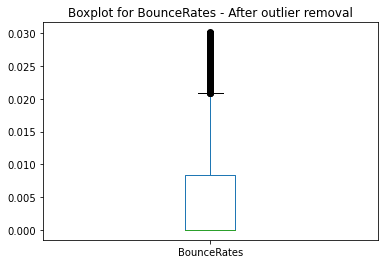

In [31]:
# After handling outliers
data['BounceRates'].plot(kind='box')
plt.title("Boxplot for BounceRates - After outlier removal")
plt.show()

In [32]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [33]:
# Reseting the index back as normal
data.reset_index(drop=True, inplace=True)

In [34]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
1,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
2,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
4,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


### Task 2: Data Exploration

#### Task 2.1

###### Descriptive statistics

In [35]:
## Descriptive statistics of numerical features
data.describe(include=['int64','float64'])

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,10087.000000,10087.000000,10087.000000,10087.000000,10087.000000,10087.000000,10087.000000,10087.000000,10087.000000,10087.000000,10087.000000,10087.000000,10087.000000,10087.000000
mean,2.515614,81.836815,0.529692,35.160998,33.457420,1232.735530,0.005140,0.026484,6.908330,0.051512,2.110241,2.378011,3.176861,3.898681
std,3.252377,158.464199,1.252436,135.910007,40.939271,1600.393041,0.007609,0.020062,20.097458,0.184065,0.900977,1.731812,2.422269,3.817943
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,10.000000,277.325000,0.000000,0.012500,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,23.000000,0.000000,0.000000,21.000000,710.666667,0.000000,0.021667,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,102.500000,0.000000,0.000000,41.000000,1576.983333,0.008371,0.034564,0.000000,0.000000,2.000000,2.000000,4.000000,4.000000
max,24.000000,1951.279141,16.000000,2252.033333,686.000000,23342.082050,0.030159,0.100000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [36]:
## Descriptive statistics of categorical features
data.describe(include=['bool','object'])

,Month,VisitorType,Weekend,Revenue
count,10087,10087,10087,10087
unique,10,3,2,2
top,May,Returning_Visitor,False,False
freq,2609,8390,7642,8301


###### Visualisation

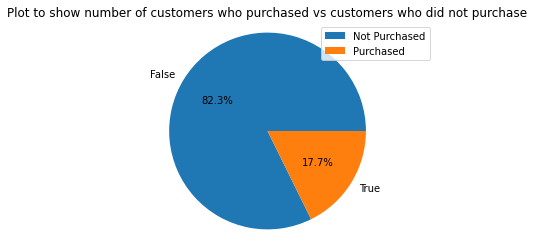

In [37]:
# Plot 1
# Pie chart - to show different categories
# Plot to show number of customers who purchased vs customers who did not purchase
data.groupby('Revenue').size().plot(kind='pie',
                                    title='Plot to show number of customers who purchased vs customers who did not purchase', 
                                    ylabel='',autopct='%1.1f%%', textprops={'fontsize': 10})
plt.legend(labels = ['Not Purchased', 'Purchased'])
plt.axis('equal')
plt.show()

From the above plot, we can see that majority of customers (82.3%) did not purchase (i.e.,) did not add any revenue to the company. Only 17.7% of the customers added the revenue to the company.

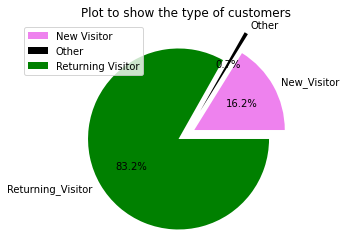

In [38]:
# Plot 2
# Plot to show the type of customers
data.groupby('VisitorType').size().plot(kind='pie',
                                    title='Plot to show the type of customers', 
                                    ylabel='',autopct='%1.1f%%', textprops={'fontsize': 10}, 
                                    explode=[0.1,0.3,0.1], colors=['violet','black','green'])
plt.legend(labels = ['New Visitor', 'Other','Returning Visitor'])
plt.axis('equal')
plt.show()

From the above plot, we can see that nearly majority (83.2%) of customers are old customers and remaining are only the new or other type of customers.

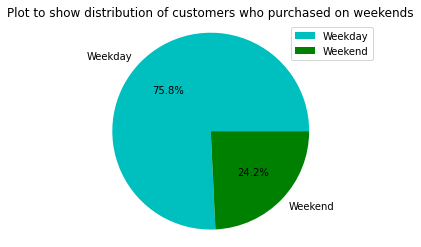

In [39]:
# Plot 3
# Pie chart - to show different categories
# Plot to show distribution of customers who purchased on weekends
plt.pie(data.groupby('Weekend').size(), labels = ['Weekday', 'Weekend'], autopct='%1.1f%%', 
        textprops={'fontsize': 10}, colors=['c','g'])
plt.title('Plot to show distribution of customers who purchased on weekends')
plt.legend()
plt.axis('equal')
plt.show()

From the above plot, we can see that percentage of customers visited the page on a weekends is less than the percentage of customers who visited the page on weekdays.

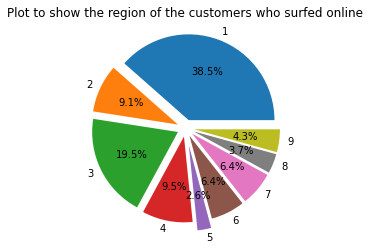

In [40]:
# Plot 4
# Pie chart - to show different categories
# Plot to show the region of the customers who surfed online
data.groupby('Region').size().plot(kind='pie',
                                    title='Plot to show the region of the customers who surfed online', 
                                    ylabel='',autopct='%1.1f%%', textprops={'fontsize': 10},
                                    explode=[0.1, 0.1, 0.1, 0.1, 0.2, 0.1, 0.1, 0.1, 0.1])
#plt.legend(labels = ['Not Purchased', 'Purchased'], loc='best')
plt.axis('equal')
plt.show()

From the above plot, we can see that most customers who surfed online are more from Region 1 (38.5%), followed by Region 3 (19.5%) and rest does not have that many online searches/shoppers.

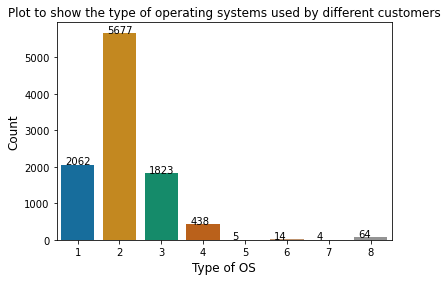

In [41]:
# Plot 5
# Plot to show the type of operating systems used by different customers
# creating the countplot
ax = sns.countplot(data['OperatingSystems'], palette = 'colorblind')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))
plt.xlabel("Type of OS", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.title("Plot to show the type of operating systems used by different customers")
plt.show()

From the above plot, we can see that customers use OS type '2' the most (5677), followed by type '1' (2062), type '3' (1823) and the rest.

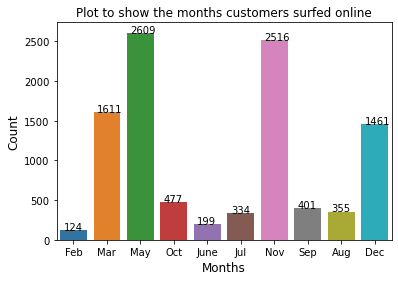

In [42]:
# Plot 6
# Plot to show the months customers surfed online
# creating the countplot
ax = sns.countplot(x=data['Month'])
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))
plt.xlabel("Months", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.title("Plot to show the months customers surfed online")
plt.show()

From the above plot, we can see that most surfed month is May (2609), followed by November (2516), March (1611), December (1461), and rest of the months has not many customer searches.

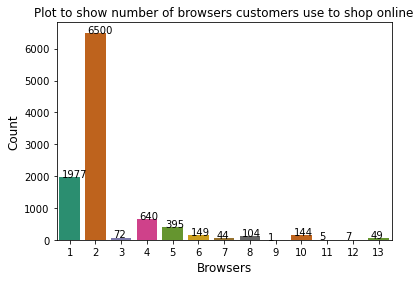

In [43]:
# Plot 7
# Plot to show number of browsers customers use to shop online
# creating the countplot
ax = sns.countplot(data['Browser'], palette = 'Dark2')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))
plt.xlabel("Browsers", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.title("Plot to show number of browsers customers use to shop online")
plt.show()

From the above plot, we can see that most customers who surfed online used Browser 2 (6500) the most, followed by Browser 1 (1977), Browser 4 (640) and rest does not have that many users.

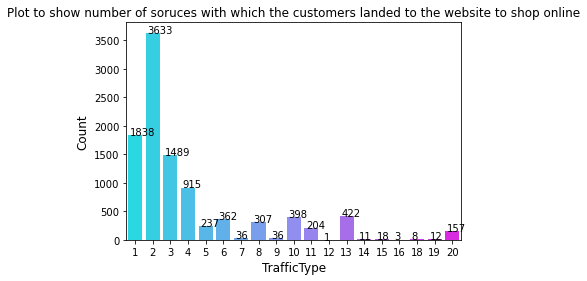

In [44]:
# Plot 8
# Plot to show number of soruces with which the customers landed to the website to shop online
# creating the countplot
ax = sns.countplot(x=data['TrafficType'], palette='cool')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))
plt.xlabel("TrafficType", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.title("Plot to show number of soruces with which the customers landed to the website to shop online")
plt.show()

From the above plot, customers landed to the shopping site mostly through the source 2 (3633), followed by source 1 (1838), source 3 (1489), source 4 (915) and other sources are less compared to the former ones.

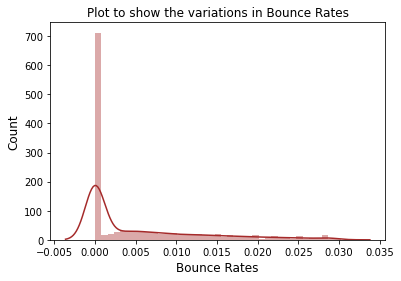

In [45]:
# Plot 9
# Plot to show the variations in Bounce Rates
# creating the distplot
sns.distplot(data['BounceRates'], color = 'brown')
plt.title('Plot to show the variations in Bounce Rates')
plt.xlabel('Bounce Rates', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

From the above plot, we can observe that the average bounce rate value of the pages visited by the visitor is at the max when value is 0.0 and decreases later.

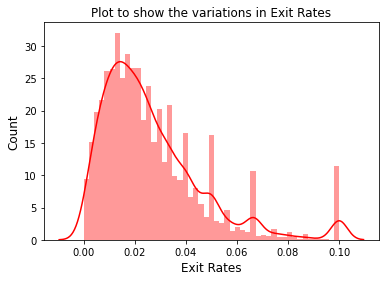

In [46]:
# Plot 10
# Plot to show the variations in Exit Rates'
# creating the distplot
sns.distplot(data['ExitRates'], color = 'red')
plt.title('Plot to show the variations in Exit Rates')
plt.xlabel('Exit Rates', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

From the above plot, we can observe that the average exit rate value of the pages visited by the visitor is raises between 0.0 to 0.02 and decreases.

#### Task 2.2

**Hypothesis 1: People prefer to shop more on weekends than on weekdays**

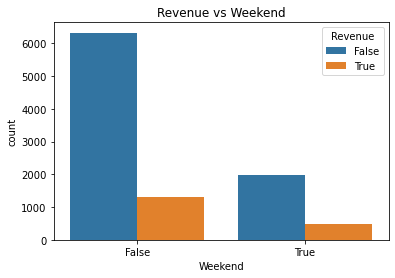

In [47]:
# Plot 1
# Revenue vs Weekend
sns.countplot(x = data['Weekend'], hue = data['Revenue'])
plt.title('Revenue vs Weekend')
plt.show()

From the above plot, we can see that number of customers who visited the shopping site pages are more on weekdays. Though majority of the visits did not end up buying, the count of customers shopping on weekdays is more when compared to customers shopping on weekends. This proves our hypothesis to be ***incorrect***.

**Hypothesis 2: Browser type plays a major role in customer's purchase**

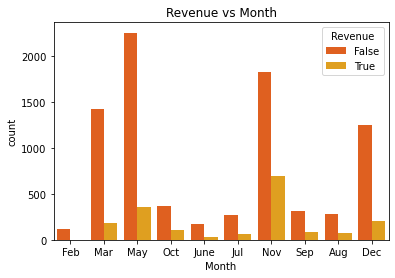

In [48]:
# Plot 2
# Revenue vs Month
sns.countplot(x = data['Month'], hue = data['Revenue'], palette='autumn')
plt.title('Revenue vs Month')
plt.show()

From the above plot, it is observed that month of November is where the count of 'Purchase' is high when compared to other months. And the month of May has large number of page visits without any purchase by the customers. This shows our hypothesis to be ***correct***.

**Hypothesis 3: Old customers prefer to shop more than others**

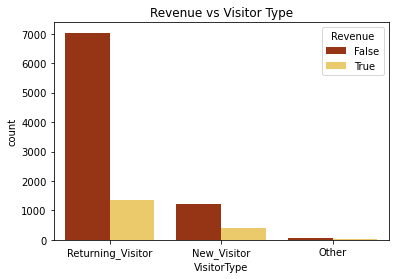

In [49]:
# Plot 3
# Revenue vs Vistor Type
sns.countplot(x = data['VisitorType'], hue = data['Revenue'], palette='afmhot')
plt.title('Revenue vs Visitor Type')
plt.show()

From the above plot, we can observe that the count of 'Returning Visitor' is high when compared to any other type of visitors with respect to making a Purchase. This shows our hypothesis to be ***correct***. 

**Hypothesis 4: People's shopping increases as special days approach**

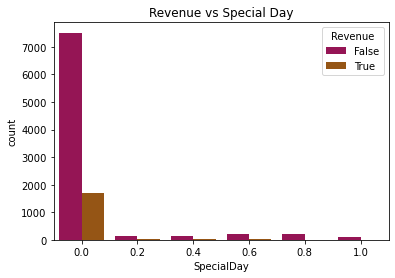

In [50]:
# Plot 4
# Revenue vs Special day
sns.countplot(x = data['SpecialDay'], hue = data['Revenue'], palette='brg')
plt.title('Revenue vs Special Day')
plt.show()

From the above plot we can see that Special Day has no impact in visitors making a purchase. This shows our hypothesis to be ***incorrect***.

**Hypothesis 5: People from specific regions do not shop online**

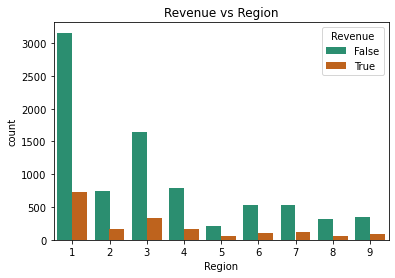

In [51]:
# Plot 5
# Revenue vs Region
sns.countplot(x = data['Region'], hue = data['Revenue'], palette='Dark2')
plt.title('Revenue vs Region')
plt.show()

From the above plot, we can confirm that the people from all regions use online shopping. Hence, our hypothesis is ***incorrect***.

**Hypothesis 6: Exit rates has impact on the purchase factor**

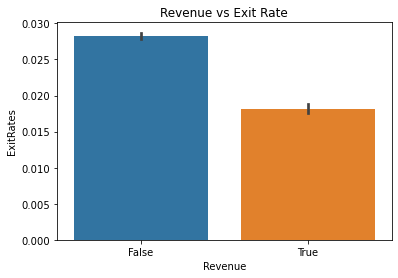

In [52]:
# Plot 6
# Revenue vs Exit rate
sns.barplot(x=data['Revenue'], y=data['ExitRates']) 
# Set title 
plt.title("Revenue vs Exit Rate")
plt.show()

From the above plot, we can observe that the exit rates are low whenever there is a 'Purchase' made. This shows that exit rates has impact on purchase factor and hence, our hypothesis is *correct*.

**Hypothesis 7: Online shoppers are spread across various regions**

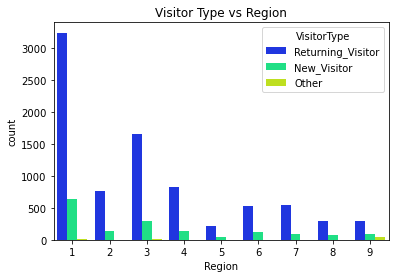

In [53]:
# Plot 7
# Visitor type vs Region
sns.countplot(x =data['Region'], hue=data['VisitorType'], palette ='gist_rainbow_r')
plt.title('Visitor Type vs Region')
plt.show()

From the above plot, we can confirm that the online shoppers are spread across all the regions with majority of them are from Region 1. This confirms our hypothesis to be ***correct***.

**Hypothesis 8: Purchase rate depends upon the amount of website's information provided in the shopping sites**

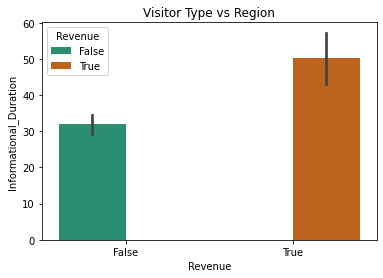

In [54]:
# Plot 8
# Revenue vs Informational Duration
sns.barplot(y =data['Informational_Duration'], x=data['Revenue'], hue=data['Revenue'], palette ='Dark2')
plt.title('Visitor Type vs Region')
plt.show()

**Hypothesis 9: Purchase rate depends upon the amount of product related information provided in the shopping sites**

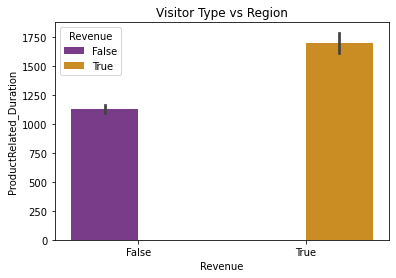

In [55]:
# Plot 9
# Revenue vs Product Related Duration
sns.barplot(y =data['ProductRelated_Duration'], x=data['Revenue'],hue=data['Revenue'], palette='CMRmap')
plt.title('Visitor Type vs Region')
plt.show()

From the above two graphs, we can confirm that, as the duration in the product or informational pages are more, it is more likely that there is a purchase made. Hence, this confirms our hypothesis 8 and 9 to be ***correct***.

**Hypothesis 10: Purchase factor depends on page value of the pages visited by the customer**

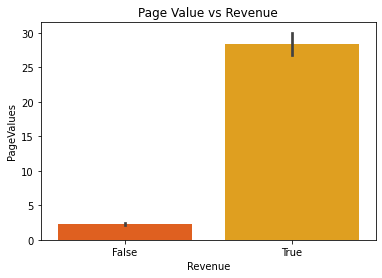

In [56]:
# Plot 10
# Pagevalue vs Revenue
sns.barplot(y=data['PageValues'], x=data['Revenue'], palette='autumn')
plt.title('Page Value vs Revenue')
plt.show()

From the above plot, we can observe that whenever there is a purchase, the average page value of the pages visited by the visitor is larger. This confirms our hypothesis to be ***correct***.

### Task 3: Data Modelling

Before we start with data modelling, we need to convert some attribute's data type and convert all the non-numeric values into numeric..

In [59]:
# Mapping values of Month with their respective numeric values
# month={'Feb':2,'Mar':3,'May':5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
# data['Month']= data['Month'].map(month)
data['Month'] = data['Month'].replace(['Feb','Mar','May','June','Jul','Aug','Sep','Oct','Nov','Dec'],['2','3','5','6','7','8','9','10','11','12'])
data['Month'] = data['Month'].astype("int")
data['VisitorType'] = data['VisitorType'].replace(["Returning_Visitor", "New_Visitor","Other"], ["0","1","2"])
data['VisitorType'] = data['VisitorType'].astype("int")
data['Weekend'] = data['Weekend'].replace([False, True], ["0","1"])
data['Weekend'] = data['Weekend'].astype("int")
data['BounceRates'] = data['BounceRates'].astype("int")
data['ExitRates'] = data['ExitRates'].astype("int")
data['PageValues'] = data['PageValues'].astype("int")
data['SpecialDay'] = data['SpecialDay'].astype("int")
data['Revenue'] = data['Revenue'].replace([False, True], ["0","1"])
data['Revenue'] = data['Revenue'].astype("int")

###### Creating datasets to train the model and converting them to numpy arrays

In [61]:
target = data['Revenue']
descriptive = data.drop(['Revenue'], axis=1)
descriptive = descriptive.to_numpy()
target = target.to_numpy()

In [62]:
# Creating test and train variables
X_train, X_test, y_train, y_test = train_test_split(descriptive,target,test_size=0.2,random_state=1)

In [63]:
X_train.shape

(8069, 17)

In [64]:
X_test.shape

(2018, 17)

In [65]:
y_train.shape

(8069,)

In [66]:
y_test.shape

(2018,)

##### Model 1: K Nearest Neighbor Classifier

###### Finding k value

Choosing maxk as 101, because maximum value for k is calculated using maxk=sqrt(n) i.e sqrt(10084)=100.43

In [67]:
errors_lst = []
maxk=101
for k in range(1,maxk):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test)
    errors = mean_squared_error(y_test,y_pred)
    errors_lst.append(errors)
miniK = np.argmin(errors_lst)
print("miniK = ", miniK+1, ", miniError = ", errors_lst[miniK])

miniK =  16 , miniError =  0.1491575817641229


Best Value of k using elbow curve is  15  with value =  0.14965312190287414


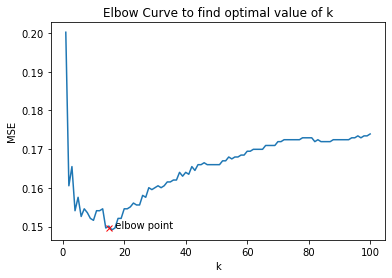

In [68]:
kVec=np.arange(1,maxk)
plt.xlabel('k')
plt.ylabel('MSE')
plt.title("Elbow Curve to find optimal value of k")
plt.plot(kVec,errors_lst)
cor_k=np.argmin(errors_lst)
plt.plot(cor_k,errors_lst[cor_k+1],'rx')
plt.annotate("  elbow point", (cor_k,errors_lst[cor_k+1]))
print("Best Value of k using elbow curve is ",cor_k," with value = ", errors_lst[cor_k+1])

From the above elbow curve plot, it is clear that MSE is low when k=15 and hence, choosing __k=15__ would be a reasonable and optimal value.

###### Feature Selection

In [69]:
## Feature Selection
new_index = []
cur_maxScore = 0.0
col_num = descriptive.shape[1]
rand_col_ind = shuffle(range(0,col_num), random_state=1)

for cur_feat in range(0, col_num):
    new_index.append(rand_col_ind[cur_feat])
    new_data = descriptive[:, new_index]
    X_train, X_test, y_train, y_test = train_test_split(new_data,target, test_size=0.2, random_state=0)
    clf = KNeighborsClassifier(15)
    fit = clf.fit(X_train, y_train)
    cur_score = clf.score(X_test, y_test)
    if cur_score < cur_maxScore:
        new_index.remove(rand_col_ind[cur_feat])
    else:
        cur_maxScore = cur_score
        print("Score with " + str(len(new_index)) + " selected features: " + str(cur_score))

Score with 1 selected features: 0.8240832507433102
Score with 2 selected features: 0.8250743310208127
Score with 3 selected features: 0.8250743310208127
Score with 4 selected features: 0.8250743310208127
Score with 5 selected features: 0.8250743310208127
Score with 6 selected features: 0.8250743310208127
Score with 7 selected features: 0.8255698711595639
Score with 8 selected features: 0.8255698711595639
Score with 9 selected features: 0.8255698711595639
Score with 10 selected features: 0.8795837462834489
Score with 11 selected features: 0.8795837462834489


In [70]:
print("There are " + str(len(new_index)) + " features selected:")
print(new_index)

There are 11 features selected:
[3, 13, 7, 6, 1, 0, 16, 15, 9, 8, 12]


In [71]:
# Features selected
for i in new_index:
    print(data.columns[i])

Informational_Duration
Region
ExitRates
BounceRates
Administrative_Duration
Administrative
Weekend
VisitorType
SpecialDay
PageValues
Browser


Score increases gradually as features increases and the score value is maximum when features selected is 10, 11.

###### KNN Model with features from feature selection with maximum accuracy

In [72]:
# Creating new dataframe with selected features
descriptive_f_o = data.iloc[:, new_index]
descriptive_f = descriptive_f_o.to_numpy()
descriptive_f_o.head()

,Informational_Duration,Region,ExitRates,BounceRates,Administrative_Duration,Administrative,Weekend,VisitorType,SpecialDay,PageValues,Browser
0,0.0,1,0,0,0.0,0,0,0,0,0,2
1,0.0,1,0,0,0.0,0,1,0,0,0,3
2,0.0,1,0,0,0.0,0,0,0,0,0,2
3,0.0,2,0,0,0.0,0,0,0,0,0,2
4,0.0,1,0,0,0.0,0,0,0,0,0,4


In [73]:
# Fitting and predicting the model
X_train, X_test, y_train, y_test = train_test_split(descriptive_f,target,test_size=0.2,random_state=0)
clf = KNeighborsClassifier(15)
fit = clf.fit(X_train, y_train)
y_pred = fit.predict(X_test)

In [74]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1598   69]
 [ 174  177]]


In [75]:
# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1667
           1       0.72      0.50      0.59       351

    accuracy                           0.88      2018
   macro avg       0.81      0.73      0.76      2018
weighted avg       0.87      0.88      0.87      2018



##### Parameter Tuning

Choosing **weights='distance'**, because data is not uniform.

In [76]:
# Fitting and predicting the model
clf = KNeighborsClassifier(15, weights='distance')
fit = clf.fit(X_train, y_train)
y_pred = fit.predict(X_test)

In [77]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1589   78]
 [ 180  171]]


In [78]:
# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1667
           1       0.69      0.49      0.57       351

    accuracy                           0.87      2018
   macro avg       0.79      0.72      0.75      2018
weighted avg       0.86      0.87      0.86      2018



Choosing additional parameter p, smaller p value (**p=1**) as dataset is of high dimension

In [79]:
# Fitting and predicting the model
clf = KNeighborsClassifier(15, weights='distance', p=1)
fit = clf.fit(X_train, y_train)
y_pred = fit.predict(X_test)

In [80]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1594   73]
 [ 186  165]]


In [81]:
# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.92      1667
           1       0.69      0.47      0.56       351

    accuracy                           0.87      2018
   macro avg       0.79      0.71      0.74      2018
weighted avg       0.86      0.87      0.86      2018



##### KFold Cross Validation

In [82]:
# Calculating the score of the model
print("[Train/test split] score: {:.5f}".format(clf.score(X_test, y_test)))

[Train/test split] score: 0.87166


In [83]:
# Set KFold cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=0, shuffle=True)

In [84]:
# Run the KFold cross validation
for k, (train_index, test_index) in enumerate(kf.split(descriptive_f_o)):
 
    X_train, X_test = descriptive_f[train_index], descriptive_f[test_index]
    y_train, y_test = target[train_index], target[test_index]
     
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))

[fold 0] score: 0.87215
[fold 1] score: 0.86373
[fold 2] score: 0.87853
[fold 3] score: 0.87457
[fold 4] score: 0.86267


##### Model 2: Decision Tree Classification

###### Feature selection and Parameter Tuning for Decision Tree Classifier Model

Parameters: criterion='gini' default, max_depth=3 as lower the max depth, lower is over fitting of the model, max_features='auto' because it chooses sqrt(max_features) and as per rule-of-thumb it works well.(As a rule-of-thumb, the square root of the total number of features works well)

In [85]:
## Feature Selection with default parameters
new_index = []
cur_maxScore = 0.0
col_num = descriptive.shape[1]
rand_col_ind = shuffle(range(0,col_num), random_state=1)

for cur_feat in range(0, col_num):
    new_index.append(rand_col_ind[cur_feat])
    new_data = descriptive[:, new_index]
    #print(new_data)
    X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(new_data,target, test_size=0.2, random_state=0)
    clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
    fit = clf.fit(X_train_tree, y_train_tree)
    cur_score = clf.score(X_test_tree, y_test_tree)
    if cur_score < cur_maxScore:
        new_index.remove(rand_col_ind[cur_feat])
    else:
        cur_maxScore = cur_score
        print("Score with " + str(len(new_index)) + " selected features: " + str(cur_score))

Score with 1 selected features: 0.8265609514370664
Score with 2 selected features: 0.8265609514370664
Score with 3 selected features: 0.8265609514370664
Score with 4 selected features: 0.8265609514370664
Score with 5 selected features: 0.8265609514370664
Score with 6 selected features: 0.8265609514370664
Score with 7 selected features: 0.8731417244796829
Score with 8 selected features: 0.8731417244796829
Score with 9 selected features: 0.8731417244796829
Score with 10 selected features: 0.8731417244796829


In [86]:
print("There are " + str(len(new_index)) + " features selected:")
print(new_index)

There are 10 features selected:
[3, 7, 6, 14, 16, 9, 8, 12, 11, 5]


In [87]:
# Features selected
for i in new_index:
    print(data.columns[i])

Informational_Duration
ExitRates
BounceRates
TrafficType
Weekend
SpecialDay
PageValues
Browser
OperatingSystems
ProductRelated_Duration


Score increases as features increases and the score value is nearly same and maximum when features selected is 7, 8, 9 and 10.

###### Parameter Tuning

In [88]:
# Creating new dataframe with selected features
descriptive_f_tree_o = data.iloc[:, new_index]
descriptive_f_tree = descriptive_f_tree_o.to_numpy()
descriptive_f_tree_o.head()

,Informational_Duration,ExitRates,BounceRates,TrafficType,Weekend,SpecialDay,PageValues,Browser,OperatingSystems,ProductRelated_Duration
0,0.0,0,0,2,0,0,0,2,2,64.000000
1,0.0,0,0,4,1,0,0,3,3,627.500000
2,0.0,0,0,3,0,0,0,2,2,154.216667
3,0.0,0,0,3,0,0,0,2,2,37.000000
4,0.0,0,0,2,0,0,0,4,2,738.000000


In [89]:
# Creating test and train datasets
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(descriptive_f_tree,target,test_size=0.2,random_state=0)

Choosing **max_features='auto'** because it chooses sqrt(max_features) and as per rule-of-thumb it works well.(As a rule-of-thumb, the square root of the total number of features works well)
Also, adding one more parameter **max_depth=3**. Lower the value of max_depth, lower is the over fitting of the data.

In [90]:
# Fitting and predicting the model
clf = DecisionTreeClassifier(criterion='gini', max_features='auto', max_depth=3, random_state=0)
fit = clf.fit(X_train_tree, y_train_tree)
y_pred_tree = fit.predict(X_test_tree)

In [91]:
# Confusion matrix
cm = confusion_matrix(y_test_tree, y_pred_tree)
print(cm)

[[1601   66]
 [ 187  164]]


In [92]:
# Classification report
print(classification_report(y_test_tree,y_pred_tree))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1667
           1       0.71      0.47      0.56       351

    accuracy                           0.87      2018
   macro avg       0.80      0.71      0.75      2018
weighted avg       0.86      0.87      0.86      2018



In [93]:
targ = ['0', '1']

with open('decTree_1f.dot', 'w') as f:
    f = tree.export_graphviz(clf, out_file= f,feature_names=descriptive_f_tree_o.columns,class_names=targ, filled=True, rounded=True, special_characters=True)

##### KFold Cross Validation

In [98]:
# Calculating the score of the model
print("[Train/test split] score: {:.5f}".format(clf.score(X_test_tree, y_test_tree)))

[Train/test split] score: 0.87463


In [99]:
# Set KFold cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=0, shuffle=True)

In [100]:
# Run the KFold cross validation
for k, (train_index, test_index) in enumerate(kf.split(descriptive_f_tree_o)):
 
    X_train_tree, X_test_tree = descriptive_f_tree[train_index], descriptive_f_tree[test_index]
    y_train_tree, y_test_tree = target[train_index], target[test_index]
     
    clf.fit(X_train_tree, y_train_tree)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test_tree, y_test_tree)))

[fold 0] score: 0.87463
[fold 1] score: 0.85580
[fold 2] score: 0.88894
[fold 3] score: 0.86316
[fold 4] score: 0.86267


### Conclusion

From the above two constructed models - KNN Classifier and Decision Tree Classifier, with the accuracy score obtained predicting the test data, the **score of KNN Classifier (0.871) is greater than the score of Decision Tree Classifier (0.874)** (though nearly the same). Hence, I conclude by saying that with the features and parameters I have opted to use in these models, and considering the advantages and disadvantages of both the classifier models, precision, recall and f1-scores as well into account, **Decision Tree Classifier model best suits to predict the intention of the online shoppers (buy or no buy)**.

### References

- Sakar, C.O. et al. (2018) Real-time prediction of online shoppers’ purchasing intention using Multilayer Perceptron and LSTM recurrent neural networks - neural computing and applications, SpringerLink. Available at: https://link.springer.com/article/10.1007/s00521-018-3523-0 (Accessed: 09 May 2023). 
- Detect and remove the outliers using Python (2023) GeeksforGeeks. Available at: https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/ (Accessed: 10 May 2023).
- Sklearn.neighbors.kneighborsclassifier (no date) scikit. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html (Accessed: 10 May 2023).
- Band, A. (2023) How to find the optimal value of K in Knn?, Medium. Available at: https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb (Accessed: 10 May 2023).
- Sklearn.tree.decisiontreeclassifier (no date) scikit. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html (Accessed: 10 May 2023).
- Arya, N. (2022) Why use K-fold cross validation?, KDnuggets. Available at: https://www.kdnuggets.com/2022/07/kfold-cross-validation.html#:~:text=K%2Dfold%20Cross%2DValidation%20is,data%20sample%20is%20split%20into. (Accessed: 23 May 2023).
- ARAT, M.M. (2019) A complete guide to K-nearest-neighbors with applications in Python, Mustafa Murat ARAT. Available at: https://mmuratarat.github.io/2019-07-12/k-nn-from-scratch#:~:text=K%2DNN%20algorithm%20is%20an,samples%20in%20the%20training%20dataset. (Accessed: 23 May 2023).
- Ren, Yongli (2023) 'Introduction/What is Data Science?' [PowerPoint slides, COSC2670], RMIT University, Melbourne.
- Ren, Yongli (2023) ' Classification (1)' [PowerPoint slides, COSC2670], RMIT University, Melbourne.
- Ren, Yongli (2023) 'Classification (2)' [PowerPoint slides, COSC2670], RMIT University, Melbourne.